In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
drink_df = pd.read_csv("starbucks-menu-nutrition-drinks.csv")
drink_types_df = pd.read_csv("starbucks_drinkMenu_expanded.csv")

# Explore and clean the data frame drink_df

In [165]:
drink_df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [166]:
drink_df.rename(columns={'Unnamed: 0':'Name'},inplace=True)

In [167]:
drink_df.replace('-',np.nan,inplace=True)

In [168]:
drink_df.isnull().sum()

Name          0
Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

In [169]:
# drop nan 
drink_df.dropna( inplace=True)

In [170]:
drink_df.isnull().sum()

Name         0
Calories     0
Fat (g)      0
Carb. (g)    0
Fiber (g)    0
Protein      0
Sodium       0
dtype: int64

In [171]:
drink_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       92 non-null     object
 1   Calories   92 non-null     object
 2   Fat (g)    92 non-null     object
 3   Carb. (g)  92 non-null     object
 4   Fiber (g)  92 non-null     object
 5   Protein    92 non-null     object
 6   Sodium     92 non-null     object
dtypes: object(7)
memory usage: 5.8+ KB


In [172]:
for col in drink_df.columns:
    if col != 'Name':
        drink_df[col] = drink_df[col].astype('float')

# Explore and clean the data frame drink_types_df

In [173]:
drink_types_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [174]:
drink_types_df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [175]:
drink_types_df[drink_types_df['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [176]:
# https://www.starbucks.com/menu/product/482/iced/nutrition - fill 125 mg as Caffeine  for the NAN value
drink_types_df.at[158,'Caffeine (mg)'] = 125


In [177]:
drink_types_df[drink_types_df['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [178]:
drink_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [179]:
drink_types_df[' Total Fat (g)'].astype('float')

ValueError: could not convert string to float: '3 2'

In [180]:
drink_types_df[drink_types_df[' Total Fat (g)'] == '3 2'] 

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In [181]:
drink_types_df.at[237,' Total Fat (g)'] = 32

In [182]:
drink_types_df[drink_types_df[' Total Fat (g)'] == '3 2'] 

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


In [183]:
drink_types_df['Caffeine (mg)'] = drink_types_df['Caffeine (mg)'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Varies'

In [184]:
drink_types_df[drink_types_df['Caffeine (mg)'] == 'Varies'] 

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0,0.0,0.0,0,0,21,0,21,0.0,0%,0%,0%,0%,Varies
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0,0.0,0.0,0,0,31,0,31,0.0,0%,0%,0%,0%,Varies
169,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Tall,100,0,0.0,0.0,0,0,25,0,24,0.1,0%,10%,0%,0%,Varies
170,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Grande,130,0,0.0,0.0,0,0,33,0,33,0.1,0%,15%,0%,0%,Varies
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0,0.0,0.0,0,0,49,0,49,0.1,0%,20%,0%,0%,Varies
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies


In [188]:
drink_types_df.replace('Varies',np.nan,inplace=True)
drink_types_df.replace('varies',np.nan,inplace=True)

In [189]:
drink_types_df['Caffeine (mg)'] = drink_types_df['Caffeine (mg)'].astype('float')

In [190]:
drink_types_df.isnull().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                22
dtype: int64

In [191]:
drink_types_df['Caffeine (mg)'].mean()

89.68181818181819

In [192]:
drink_types_df.fillna(value=drink_types_df['Caffeine (mg)'].mean(),inplace=True)

In [193]:
drink_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [194]:
drink_types_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [212]:
# sort and remove duplicate

drink_types_df  = drink_types_df.sort_values(['Calories'],ascending=False)

In [213]:
drink_types_df.drop_duplicates(subset=['Beverage_category','Beverage','Beverage_prep'],keep='first')

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150.000000
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145.000000
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150.000000
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150.000000
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.000000
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,89.681818
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,89.681818
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,89.681818


# Explore the data through visualization

# Find answers to the following questions
1) High-calorie drink
2) High carb drink
3) High fat drink

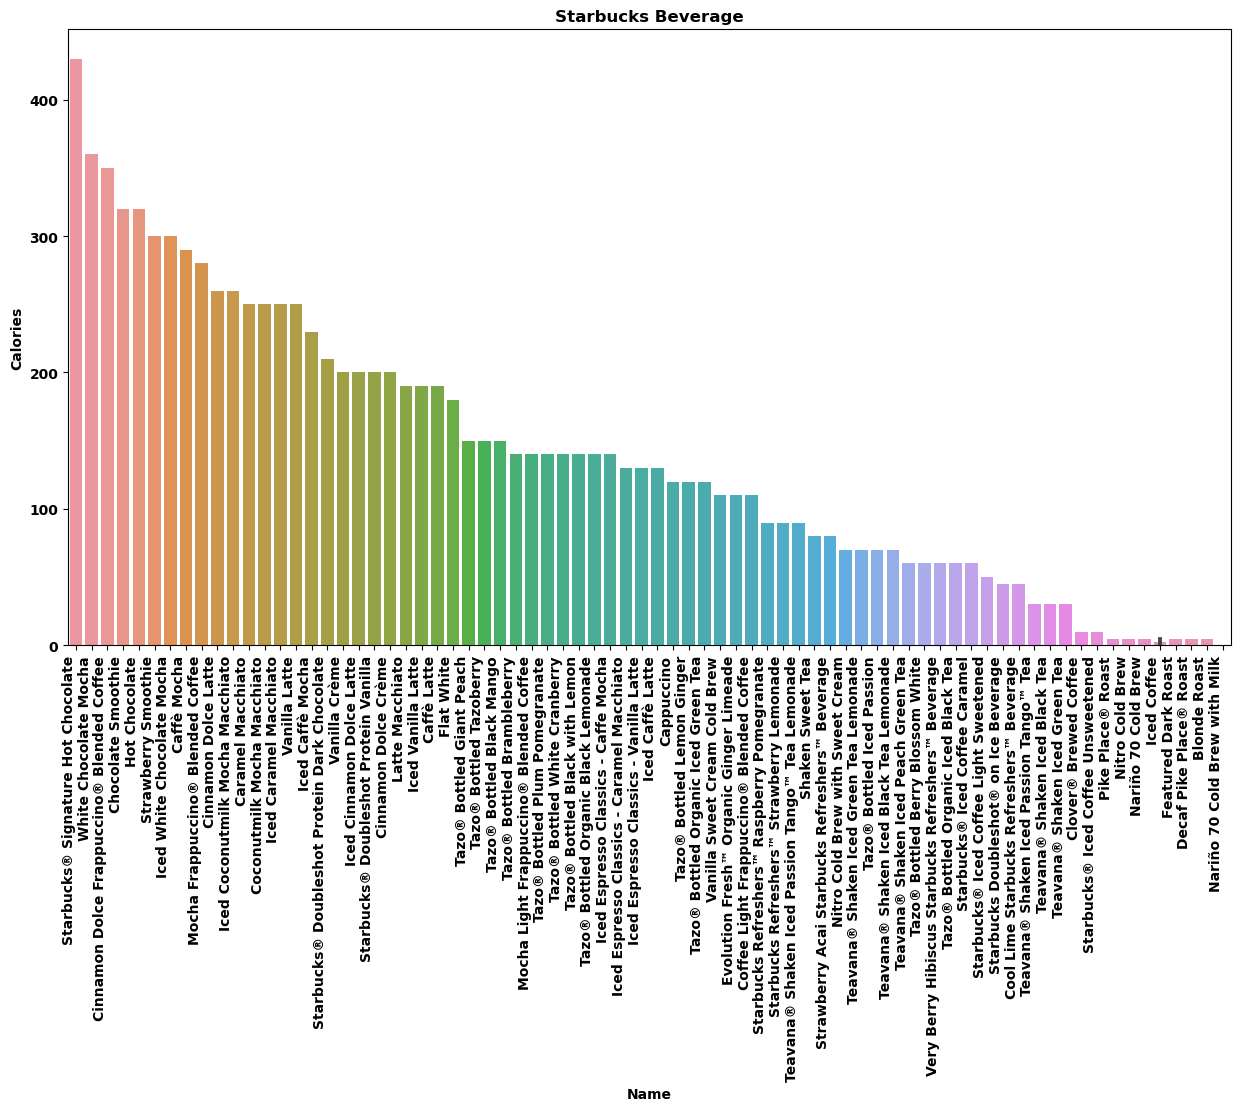

In [51]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Name", y="Calories", data=drink_df.sort_values('Calories',ascending=False))
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage")
plt.show()


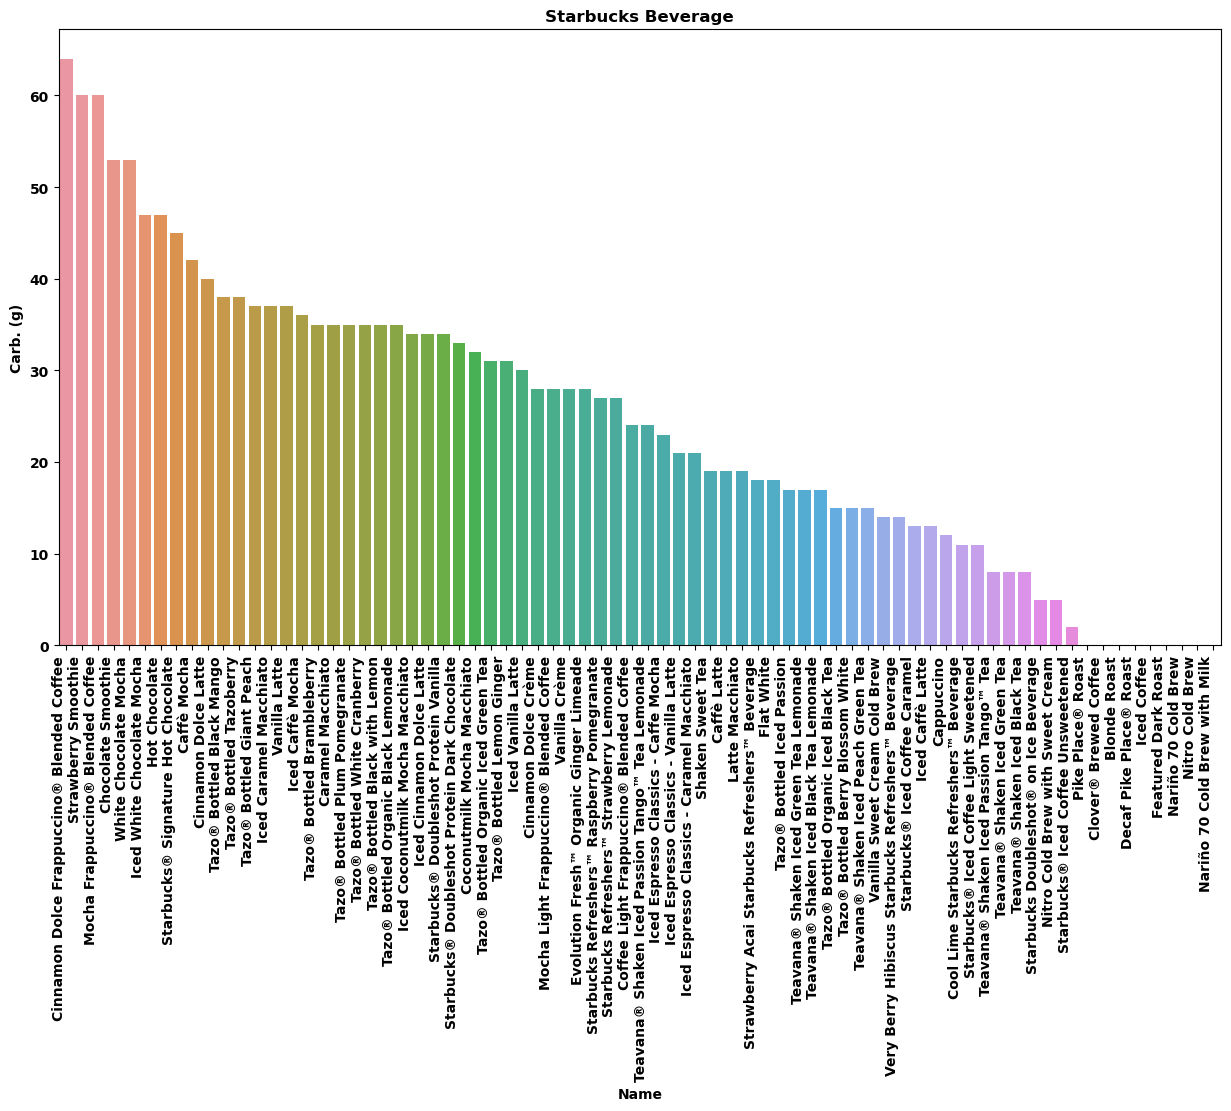

In [50]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Name", y="Carb. (g)", data=drink_df.sort_values('Carb. (g)',ascending=False))
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage")
plt.show()

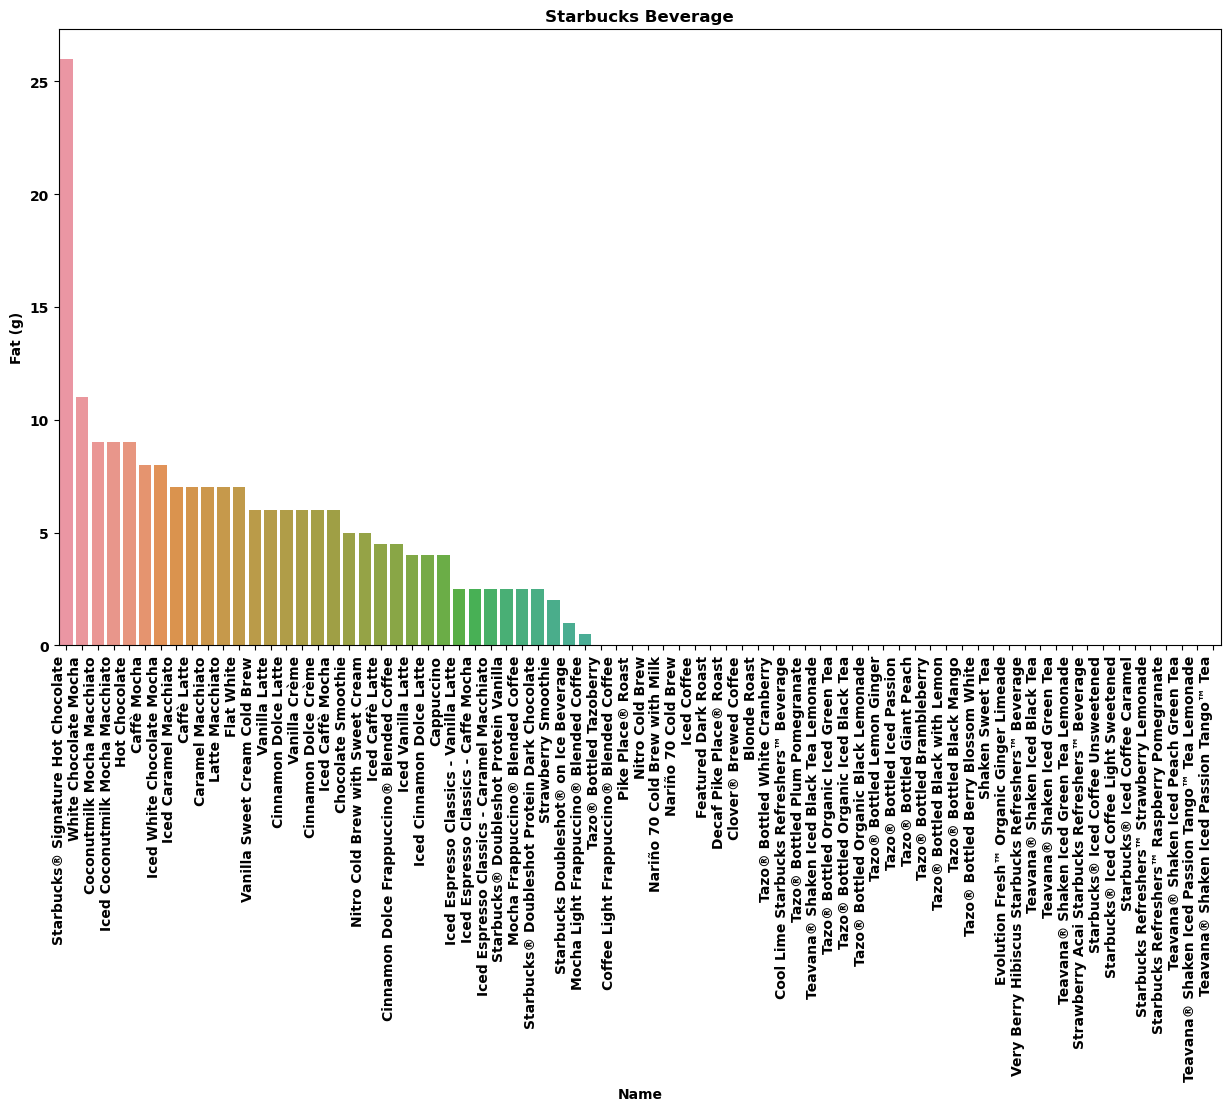

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Name", y="Fat (g)", data=drink_df.sort_values('Fat (g)',ascending=False))
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage")
plt.show()


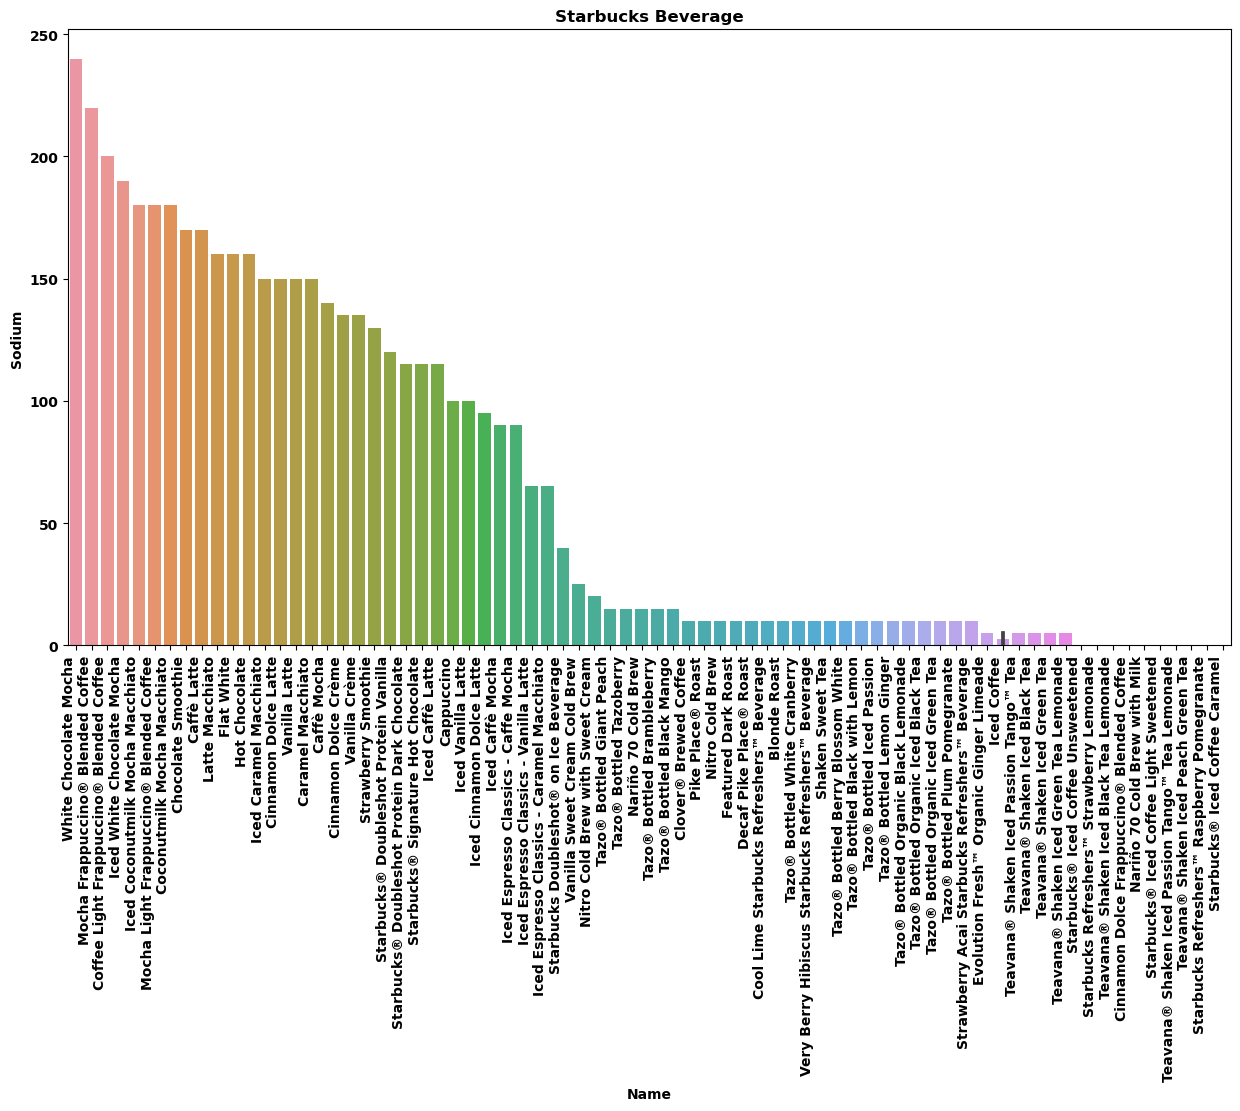

In [56]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Name", y="Sodium", data=drink_df.sort_values('Sodium',ascending=False))
plt.xticks(rotation=90, ha='right')
plt.title("Starbucks Beverage")
plt.show()

Following are the drinks that are high based on the nutritents
1) High-calorie drink - Starbucks® Signature Hot Chocolate - 430 g
2) High-carb drink - Cinnamon Dolce Frappuccino® Blended Coffee	- 64 g
3) High-fat drink - Starbucks® Signature Hot Chocolate - 26 g
4) High-sodium - White Chocolate Mocha - 240 mg

In [60]:
drink_types_df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

# Category - Coffee
Let's visualize calorie

In [214]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Coffee'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  Trans Fat (g)   \
Beverage_category Beverage      Beverage_prep                             
Coffee            Brewed Coffee Grande                5             0.0   
                                Short                 3             0.0   
                                Tall                  4             0.0   
                                Venti                 5             0.0   

                                               Saturated Fat (g)  \
Beverage_category Beverage      Beverage_prep                      
Coffee            Brewed Coffee Grande                       0.0   
                                Short                        0.0   
                                Tall                         0.0   
                                Venti                        0.0   

                                                Sodium (mg)  \
Beverage_category Beverage      Beverage_prep                 
Coffee            Brewed Coffee Grande                    0   
                                Short                     0   
                                Tall                      0   
                                Venti                     0   

                                                Total Carbohydrates (g)   \
Beverage_category Beverage      Beverage_prep                              
Coffee            Brewed Coffee Grande                                10   
                                Short                                  5   
                                Tall                                  10   
                                Venti                                 10   

                                               Cholesterol (mg)  \
Beverage_category Beverage      Beverage_prep                     
Coffee            Brewed Coffee Grande                        0   
                                Short                         0   
                                Tall                          0   
                                Venti                         0   

                                                Dietary Fibre (g)  \
Beverage_category Beverage      Beverage_prep                       
Coffee            Brewed Coffee Grande                          0   
                                Short                           0   
                                Tall                            0   
                                Venti                           0   

                                                Sugars (g)   Protein (g)   \
Beverage_category Beverage      Beverage_prep                               
Coffee            Brewed Coffee Grande                   0            1.0   
                                Short                    0            0.3   
                                Tall                     0            0.5   
                                Venti                    0            1.0   

                                               Caffeine (mg)  
Beverage_category Beverage      Beverage_prep                 
Coffee            Brewed Coffee Grande                 330.0  
                                Short                  175.0  
                                Tall                   260.0  
                                Venti                  410.0

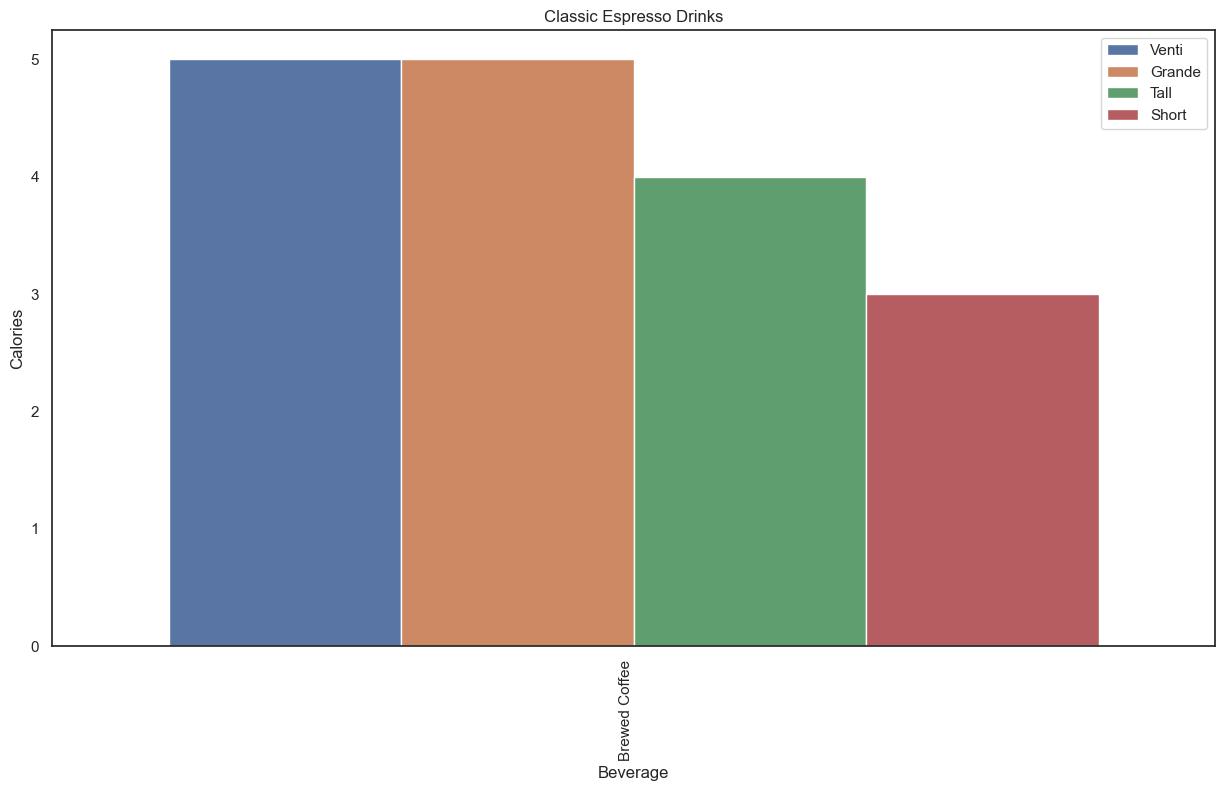

In [215]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Coffee'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Classic Espresso Drinks')

# High calorie - Brewed coffee - 5 g (very little calorie)

# Category - Classic Espresso Drinks
Let's visualize calorie

In [216]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Classic Espresso Drinks'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category       Beverage                                 Beverage_prep                  
Classic Espresso Drinks Caffè Americano                          Grande                    15   
                                                                 Short                      5   
                                                                 Tall                      10   
                                                                 Venti                     25   
                        Caffè Latte                              2% Milk                  240   
                                                                 Grande Nonfat Milk       130   
                                                                 Short Nonfat Milk         70   
                                                                 Soymilk                  190   
                                                                 Tall Nonfat Milk         100   
                                                                 Venti Nonfat Milk        170   
                        Caffè Mocha (Without Whipped Cream)      2% Milk                  340   
                                                                 Grande Nonfat Milk       220   
                                                                 Short Nonfat Milk        110   
                                                                 Soymilk                  290   
                                                                 Tall Nonfat Milk         170   
                                                                 Venti Nonfat Milk        280   
                        Cappuccino                               2% Milk                  150   
                                                                 Grande Nonfat Milk        80   
                                                                 Short Nonfat Milk         50   
                                                                 Soymilk                  120   
                                                                 Tall Nonfat Milk          60   
                                                                 Venti Nonfat Milk        110   
                        Espresso                                 Doppio                    10   
                                                                 Solo                       5   
                        Skinny Latte (Any Flavour)               Grande Nonfat Milk       120   
                                                                 Short Nonfat Milk         60   
                                                                 Tall Nonfat Milk         100   
                                                                 Venti Nonfat Milk        160   
                        Vanilla Latte (Or Other Flavoured Latte) 2% Milk                  320   
                                                                 Grande Nonfat Milk       200   
                                                                 Short Nonfat Milk        100   
                                                                 Soymilk                  270   
                                                                 Tall Nonfat Milk         150   
                                                                 Venti Nonfat Milk        250   

                                                                                     Trans Fat (g)   \
Beverage_category       Beverage                                 Beverage_prep                        
Classic Espresso Drinks Caffè Americano                          Grande                         0.0   
                                                                 Short                          0.0   
                                                                 Tall                           0.0   
                                                                 Venti       

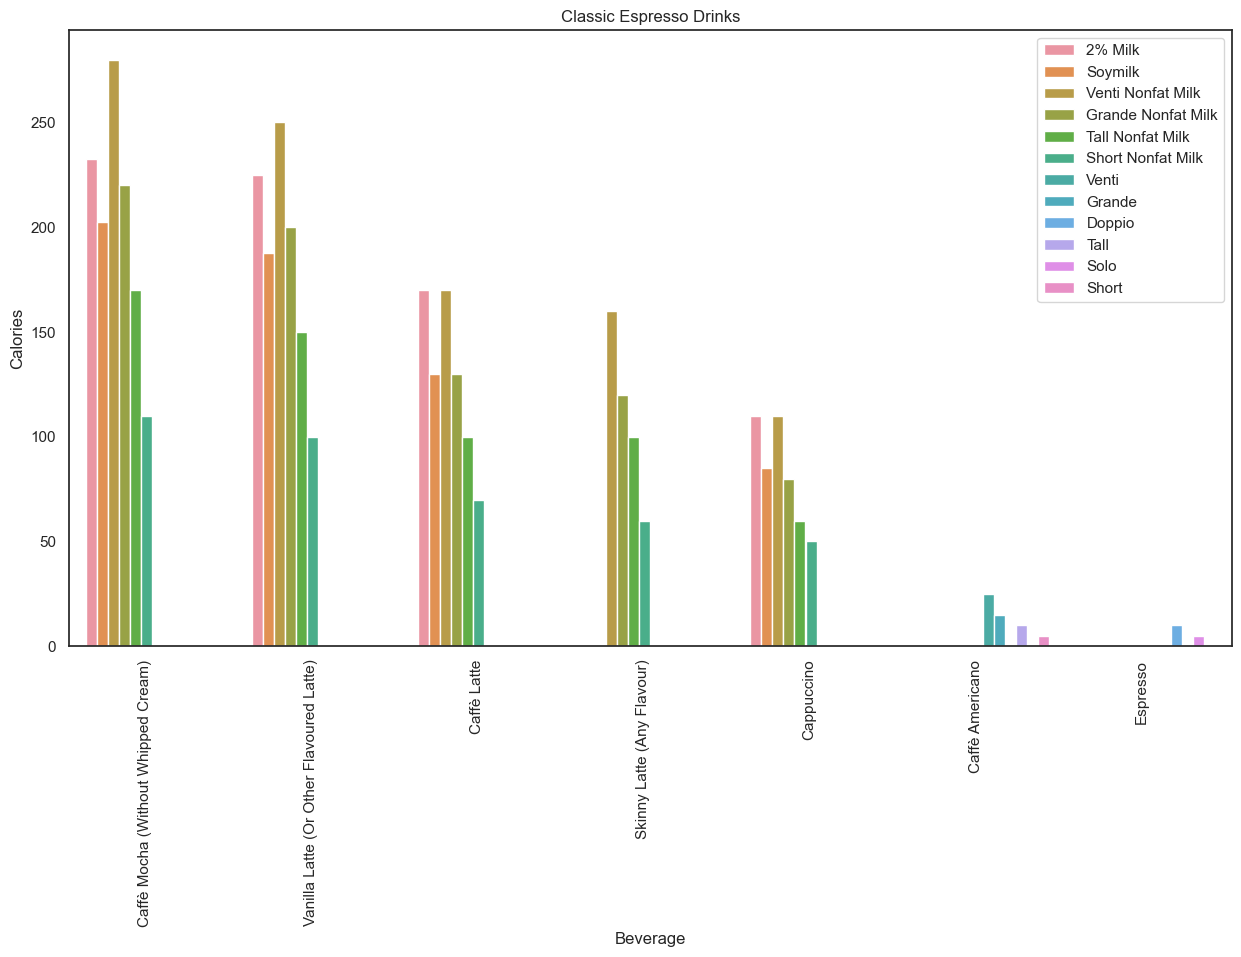

In [217]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Classic Espresso Drinks'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Classic Espresso Drinks')

# High calorie - Caffè Mocha (Without Whipped Cream) - very high calorie of 340 g

# Category - Signature Espresso Drinks
Let's visualize calorie

In [218]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Signature Espresso Drinks'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category         Beverage                                      Beverage_prep                  
Signature Espresso Drinks Caramel Apple Spice (Without Whipped Cream)   Grande                   280   
                                                                        Short                    140   
                                                                        Tall                     210   
                                                                        Venti                    360   
                          Caramel Macchiato                             2% Milk                  300   
                                                                        Grande Nonfat Milk       190   
                                                                        Short Nonfat Milk        100   
                                                                        Soymilk                  250   
                                                                        Tall Nonfat Milk         140   
                                                                        Venti Nonfat Milk        240   
                          Hot Chocolate (Without Whipped Cream)         2% Milk                  380   
                                                                        Grande Nonfat Milk       240   
                                                                        Short Nonfat Milk        130   
                                                                        Soymilk                  330   
                                                                        Tall Nonfat Milk         190   
                                                                        Venti Nonfat Milk        320   
                          White Chocolate Mocha (Without Whipped Cream) 2% Milk                  510   
                                                                        Grande Nonfat Milk       350   
                                                                        Short Nonfat Milk        180   
                                                                        Soymilk                  460   
                                                                        Tall Nonfat Milk         270   
                                                                        Venti Nonfat Milk        450   

                                                                                            Trans Fat (g)   \
Beverage_category         Beverage                                      Beverage_prep                        
Signature Espresso Drinks Caramel Apple Spice (Without Whipped Cream)   Grande                         0.0   
                                                                        Short                          0.0   
                                                                        Tall                           0.0   
                                                                        Venti                          0.0   
                          Caramel Macchiato                             2% Milk                        4.5   
                                                                        Grande Nonfat Milk             1.0   
                                                                        Short Nonfat Milk              0.5   
                                                                        Soymilk                        1.5   
                                                                        Tall Nonfat Milk               0.5   
                                                                        Venti Nonfat Milk              1.0   
                          Hot Chocolate (Without Whipped Cream)         2% Milk                        6.0   
                                                                        Grande Nonfat Milk             1.5   
                                                       

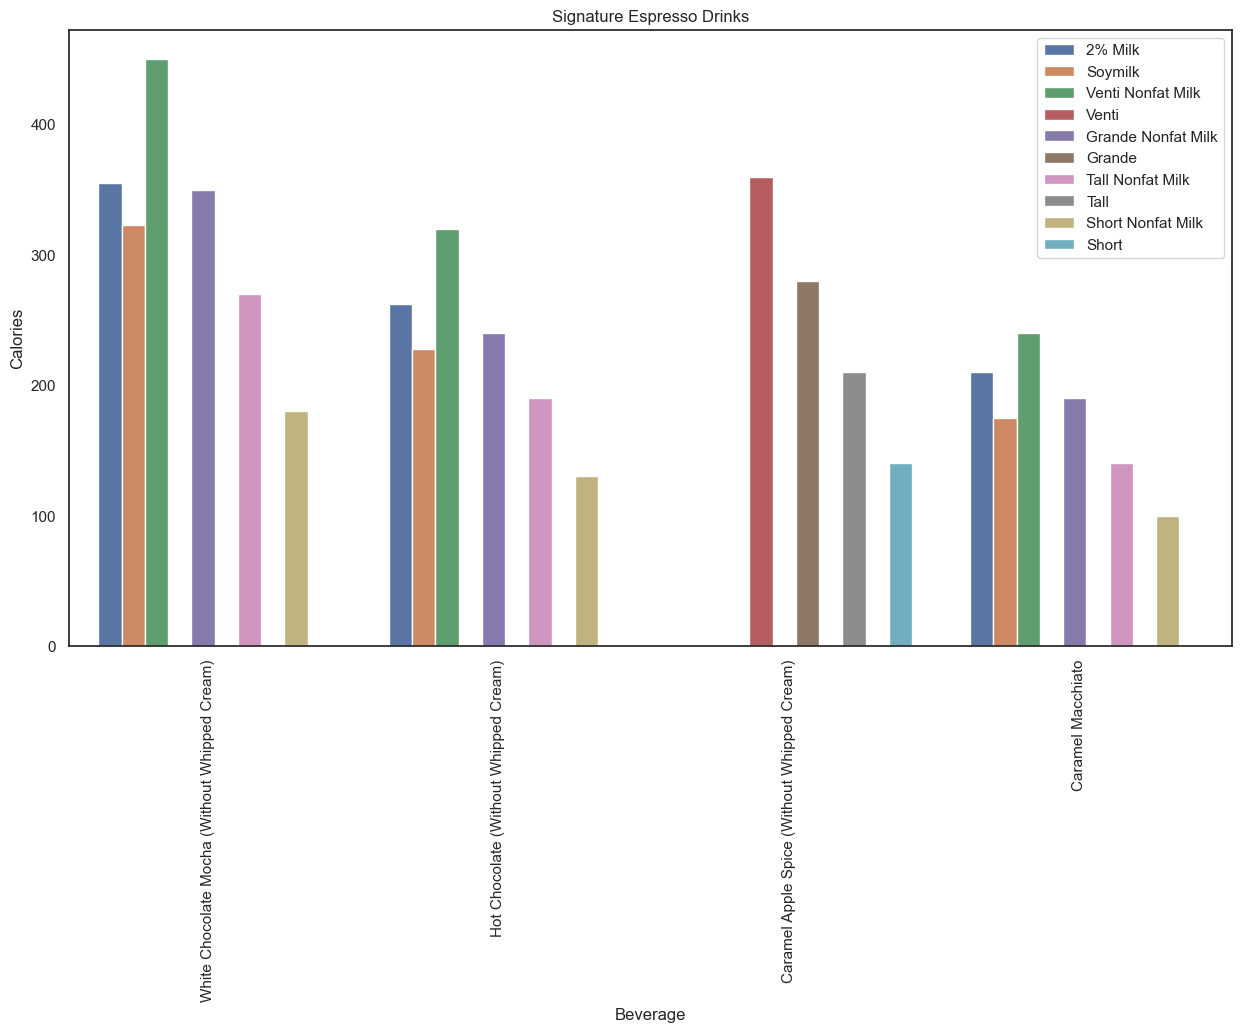

In [219]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Signature Espresso Drinks'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Signature Espresso Drinks')

# High calorie - White Chocolate Mocha (Without Whipped Cream) - very high calorie of 510 g

# Category - Tazo® Tea Drinks
Let's visualize calorie

In [220]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Tazo® Tea Drinks'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category Beverage                                        Beverage_prep                  
Tazo® Tea Drinks  Tazo® Chai Tea Latte                            2% Milk                  310   
                                                                  Grande Nonfat Milk       210   
                                                                  Short Nonfat Milk        100   
                                                                  Soymilk                  280   
                                                                  Tall Nonfat Milk         160   
                                                                  Venti Nonfat Milk        260   
                  Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos) 2% Milk                  230   
                                                                  Grande Nonfat Milk       150   
                                                                  Short Nonfat Milk         80   
                                                                  Soymilk                  210   
                                                                  Tall Nonfat Milk         120   
                                                                  Venti Nonfat Milk        190   
                  Tazo® Full-Leaf Tea Latte                       2% Milk                  230   
                                                                  Grande Nonfat Milk       150   
                                                                  Short Nonfat Milk         80   
                                                                  Soymilk                  210   
                                                                  Tall Nonfat Milk         120   
                                                                  Venti Nonfat Milk        190   
                  Tazo® Green Tea Latte                           2% Milk                  450   
                                                                  Grande Nonfat Milk       290   
                                                                  Short Nonfat Milk        130   
                                                                  Soymilk                  390   
                                                                  Tall Nonfat Milk         210   
                                                                  Venti Nonfat Milk        370   
                  Tazo® Tea                                       Grande                     0   
                                                                  Short                      0   
                                                                  Tall                       0   
                                                                  Venti                      0   

                                                                                      Trans Fat (g)   \
Beverage_category Beverage                                        Beverage_prep                        
Tazo® Tea Drinks  Tazo® Chai Tea Latte                            2% Milk                        3.0   
                                                                  Grande Nonfat Milk             0.1   
                                                                  Short Nonfat Milk              0.1   
                                                                  Soymilk                        0.5   
                                                                  Tall Nonfat Milk               0.1   
                                                                  Venti Nonfat Milk              0.2   
                  Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos) 2% Milk                        2.5   
                                                                  Grande Nonfat Milk             0.1   
                                                                  Short Nonfat Milk              0.1   
 

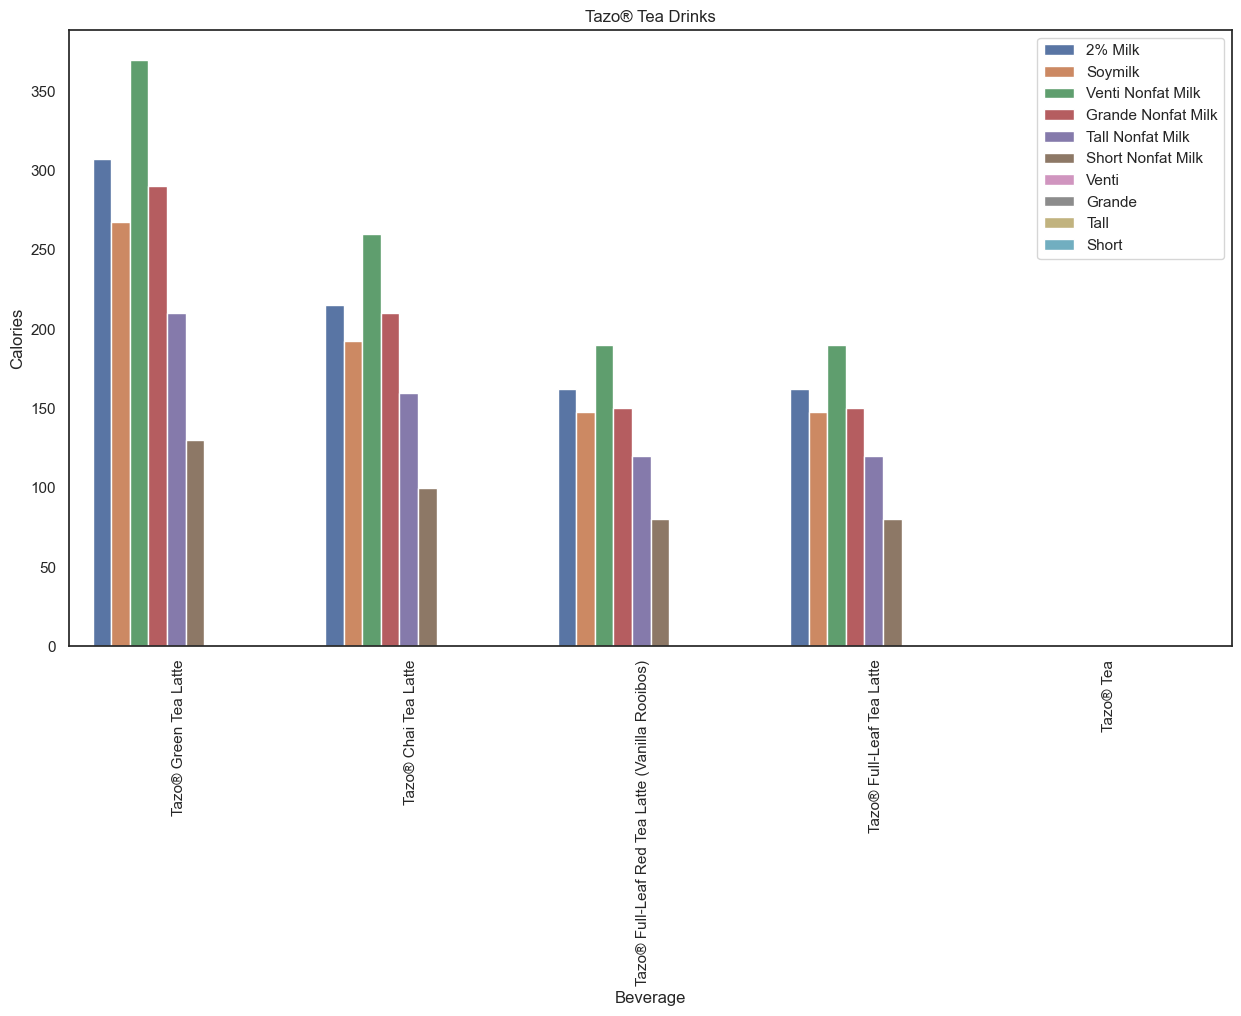

In [221]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Tazo® Tea Drinks'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Tazo® Tea Drinks')

# High calorie - Tazo® Green Tea Latte- very high calorie of 450 g

# Category - Shaken Iced Beverages
Let's visualize calorie

In [222]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Shaken Iced Beverages'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category     Beverage                                           Beverage_prep                  
Shaken Iced Beverages Iced Brewed Coffee (With Classic Syrup)            Grande                    90   
                                                                         Tall                      60   
                                                                         Venti                    130   
                      Iced Brewed Coffee (With Milk & Classic Syrup)     2% Milk                  180   
                                                                         Grande Nonfat Milk       110   
                                                                         Soymilk                  170   
                                                                         Tall Nonfat Milk          80   
                                                                         Venti Nonfat Milk        160   
                      Shaken Iced Tazo® Tea (With Classic Syrup)         Grande                    80   
                                                                         Tall                      60   
                                                                         Venti                    120   
                      Shaken Iced Tazo® Tea Lemonade (With Classic Sy... Grande                   130   
                                                                         Tall                     100   
                                                                         Venti                    190   

                                                                                             Trans Fat (g)   \
Beverage_category     Beverage                                           Beverage_prep                        
Shaken Iced Beverages Iced Brewed Coffee (With Classic Syrup)            Grande                         0.0   
                                                                         Tall                           0.0   
                                                                         Venti                          0.0   
                      Iced Brewed Coffee (With Milk & Classic Syrup)     2% Milk                        1.0   
                                                                         Grande Nonfat Milk             0.0   
                                                                         Soymilk                        0.2   
                                                                         Tall Nonfat Milk               0.0   
                                                                         Venti Nonfat Milk              0.1   
                      Shaken Iced Tazo® Tea (With Classic Syrup)         Grande                         0.0   
                                                                         Tall                           0.0   
                                                                         Venti                          0.0   
                      Shaken Iced Tazo® Tea Lemonade (With Classic Sy... Grande                         0.0   
                                                                         Tall                           0.0   
                                                                         Venti                          0.0   

                                                                                             Saturated Fat (g)  \
Beverage_category     Beverage                                           Beverage_prep                           
Shaken Iced Beverages Iced Brewed Coffee (With Classic Syrup)            Grande                            0.0   
                                                                         Tall                              0.0   
                                                                         Venti                             0.0   
                      Iced Brewed Coffee (With Milk & Classic Syr

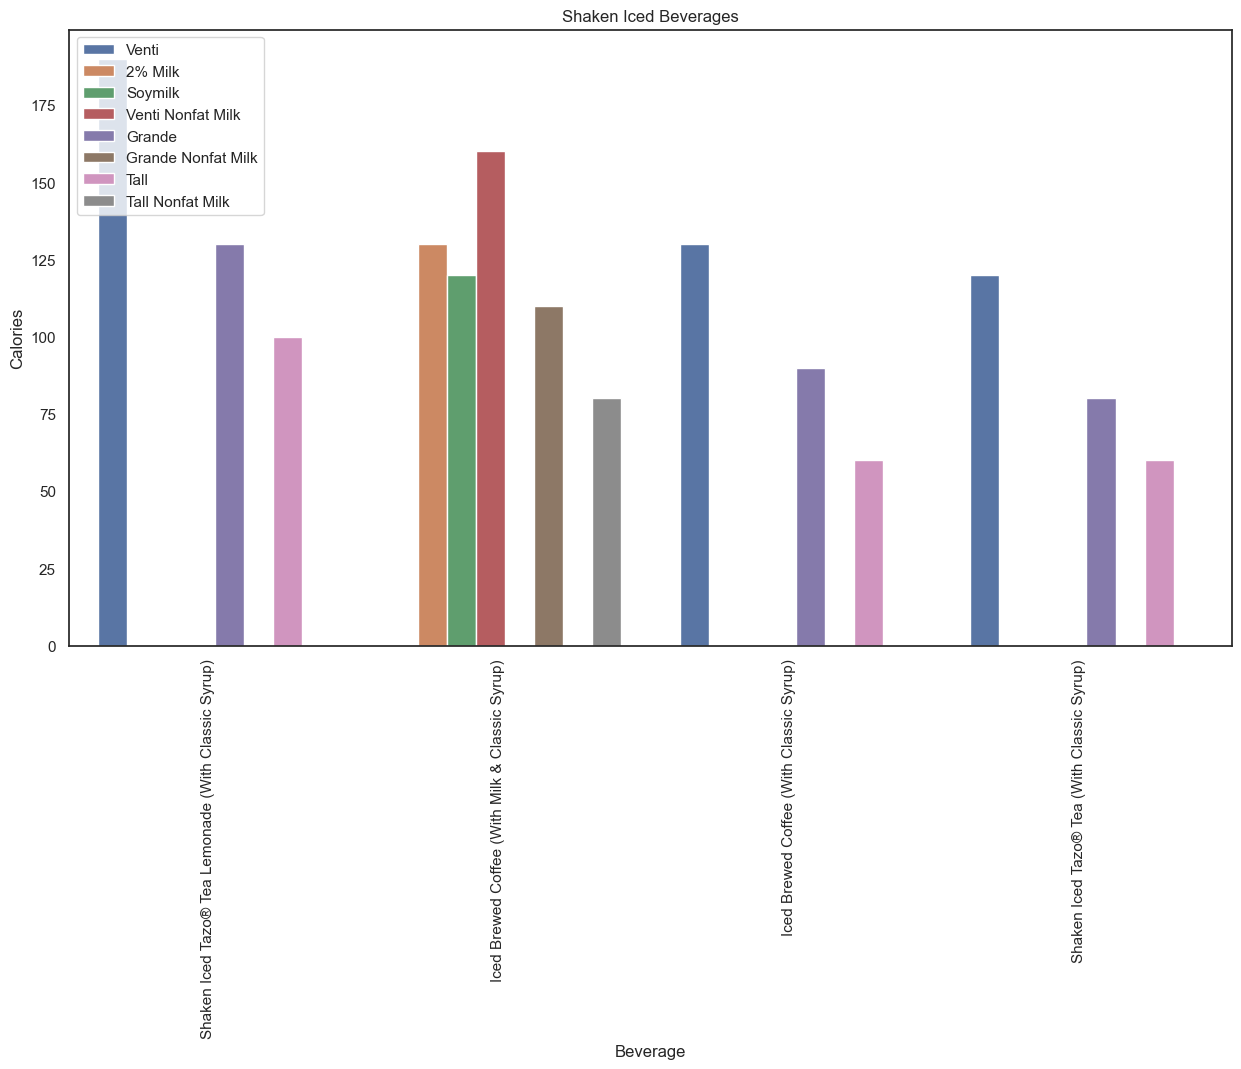

In [223]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Shaken Iced Beverages'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper left')
_= plt.title('Shaken Iced Beverages')

# High calorie - Shaken Iced Tazo® Tea Lemonade (With Classic Syrup) - calorie of 190 g

# Category - Frappuccino® Blended Coffee
Let's visualize calorie

In [224]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Blended Coffee'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category           Beverage                          Beverage_prep                  
Frappuccino® Blended Coffee Caramel (Without Whipped Cream)   Grande Nonfat Milk       280   
                                                              Soymilk                  340   
                                                              Tall Nonfat Milk         180   
                                                              Venti Nonfat Milk        330   
                                                              Whole Milk               370   
                            Coffee                            Grande Nonfat Milk       220   
                                                              Soymilk                  310   
                                                              Tall Nonfat Milk         160   
                                                              Venti Nonfat Milk        310   
                                                              Whole Milk               350   
                            Java Chip (Without Whipped Cream) Grande Nonfat Milk       310   
                                                              Soymilk                  430   
                                                              Tall Nonfat Milk         220   
                                                              Venti Nonfat Milk        420   
                                                              Whole Milk               460   
                            Mocha (Without Whipped Cream)     Grande Nonfat Milk       260   
                                                              Soymilk                  350   
                                                              Tall Nonfat Milk         180   
                                                              Venti Nonfat Milk        340   
                                                              Whole Milk               390   

                                                                                  Trans Fat (g)   \
Beverage_category           Beverage                          Beverage_prep                        
Frappuccino® Blended Coffee Caramel (Without Whipped Cream)   Grande Nonfat Milk             0.1   
                                                              Soymilk                        0.3   
                                                              Tall Nonfat Milk               0.0   
                                                              Venti Nonfat Milk              0.1   
                                                              Whole Milk                     3.0   
                            Coffee                            Grande Nonfat Milk             0.1   
                                                              Soymilk                        0.3   
                                                              Tall Nonfat Milk               0.0   
                                                              Venti Nonfat Milk              0.1   
                                                              Whole Milk                     3.0   
                            Java Chip (Without Whipped Cream) Grande Nonfat Milk             3.0   
                                                              Soymilk                        4.5   
                                                              Tall Nonfat Milk               2.0   
                                                              Venti Nonfat Milk              4.0   
                                                              Whole Milk                     7.0   
                            Mocha (Without Whipped Cream)     Grande Nonfat Milk             0.5   
                                                              Soymilk                        1.0   
                                                              Tall Nonfat Milk               0.4   
             

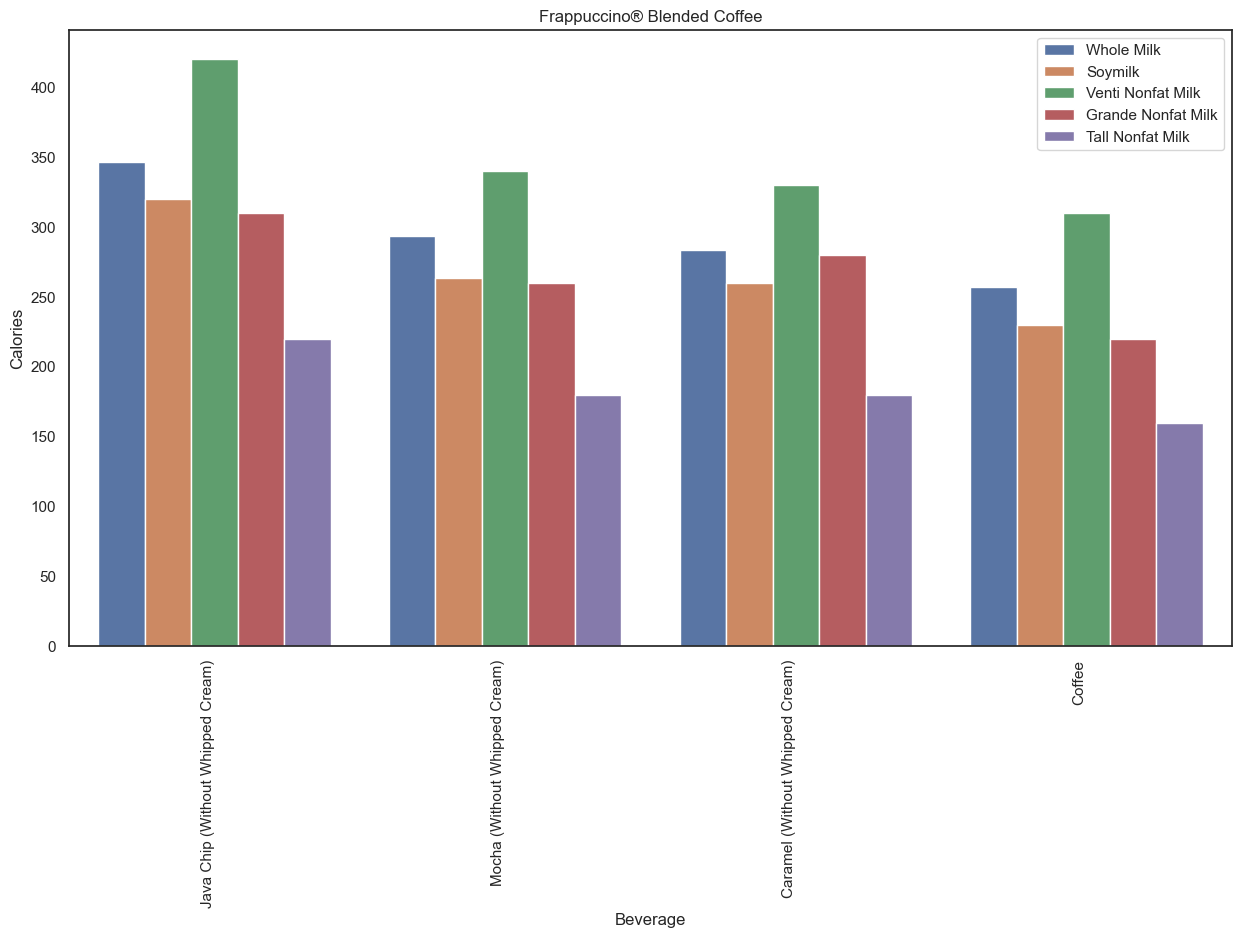

In [233]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Blended Coffee'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Frappuccino® Blended Coffee')

# High calorie - Java Chip (Without Whipped Cream) - very high calorie of 460 g

# Category - Frappuccino® Light Blended Coffee
Let's visualize calorie

In [226]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Light Blended Coffee'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category                 Beverage  Beverage_prep                  
Frappuccino® Light Blended Coffee Caramel   Grande Nonfat Milk       150   
                                            Tall Nonfat Milk         100   
                                            Venti Nonfat Milk        200   
                                  Coffee    Grande Nonfat Milk       120   
                                            Tall Nonfat Milk          90   
                                            Venti Nonfat Milk        160   
                                  Java Chip Grande Nonfat Milk       220   
                                            Tall Nonfat Milk         150   
                                            Venti Nonfat Milk        290   
                                  Mocha     Grande Nonfat Milk       150   
                                            Tall Nonfat Milk         110   
                                            Venti Nonfat Milk        210   

                                                                Trans Fat (g)   \
Beverage_category                 Beverage  Beverage_prep                        
Frappuccino® Light Blended Coffee Caramel   Grande Nonfat Milk             0.1   
                                            Tall Nonfat Milk               0.0   
                                            Venti Nonfat Milk              0.1   
                                  Coffee    Grande Nonfat Milk             0.1   
                                            Tall Nonfat Milk               0.0   
                                            Venti Nonfat Milk              0.1   
                                  Java Chip Grande Nonfat Milk             3.0   
                                            Tall Nonfat Milk               2.0   
                                            Venti Nonfat Milk              4.0   
                                  Mocha     Grande Nonfat Milk             0.5   
                                            Tall Nonfat Milk               0.4   
                                            Venti Nonfat Milk              0.5   

                                                                Saturated Fat (g)  \
Beverage_category                 Beverage  Beverage_prep                           
Frappuccino® Light Blended Coffee Caramel   Grande Nonfat Milk                0.0   
                                            Tall Nonfat Milk                  0.0   
                                            Venti Nonfat Milk                 0.0   
                                  Coffee    Grande Nonfat Milk                0.0   
                                            Tall Nonfat Milk                  0.0   
                                            Venti Nonfat Milk                 0.0   
                                  Java Chip Grande Nonfat Milk                0.0   
                                            Tall Nonfat Milk                  0.0   
                                            Venti Nonfat Milk                 0.0   
                                  Mocha     Grande Nonfat Milk                0.0   
                                            Tall Nonfat Milk                  0.0   
                                            Venti Nonfat Milk                 0.0   

                                                                 Sodium (mg)  \
Beverage_category                 Beverage  Beverage_prep                      
Frappuccino® Light Blended Coffee Caramel   Grande Nonfat Milk             0   
                                            Tall Nonfat Milk               0   
                                            Venti Nonfat Milk              5   
                                  Coffee    Grande Nonfat Milk             0   
                                            Tall Nonfat Milk               0   
                                            Venti Nonfat Milk              5   
                   

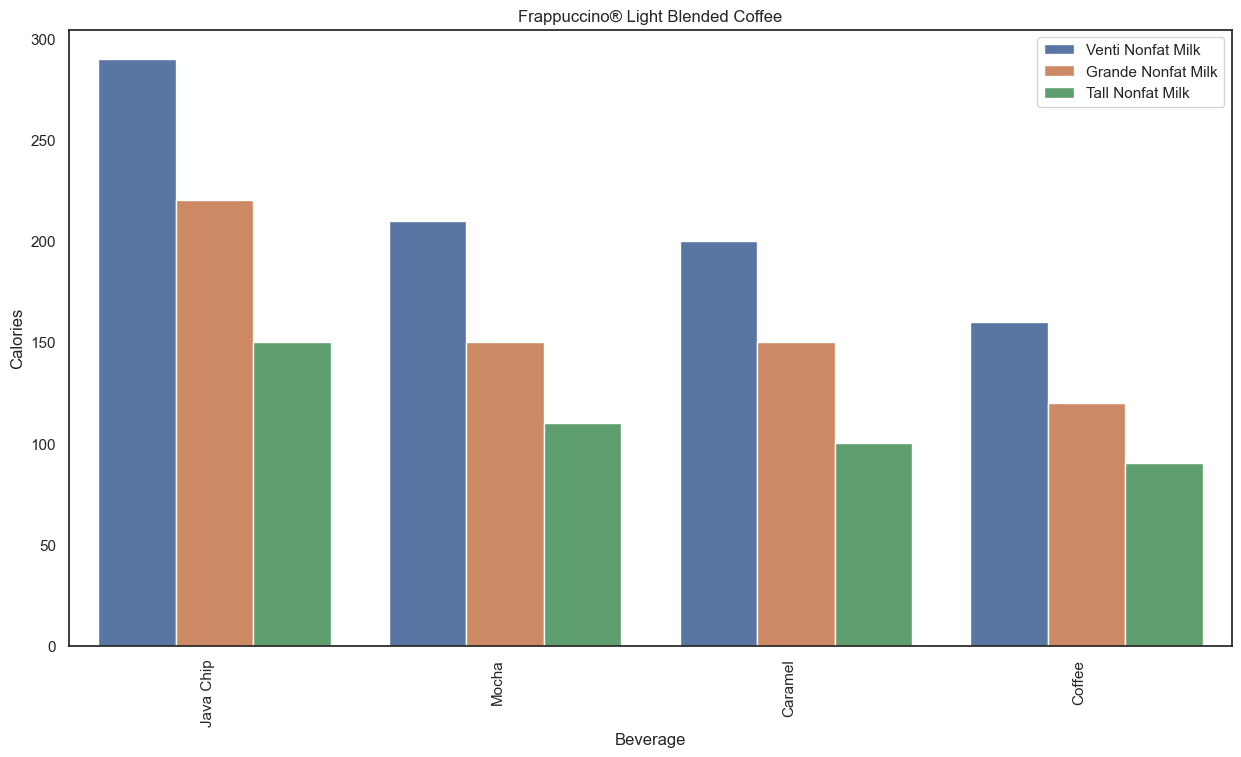

In [227]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Light Blended Coffee'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend()
_= plt.title('Frappuccino® Light Blended Coffee')

# High calorie - Java Chip - high calorie of 290 g

# Category - Frappuccino® Blended Crème
Let's visualize calorie

In [228]:
(drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Blended Crème'].groupby(['Beverage_category','Beverage','Beverage_prep']).max('Calories'))

Calories  \
Beverage_category          Beverage                                     Beverage_prep                  
Frappuccino® Blended Crème Strawberries & Crème (Without Whipped Cream) Grande Nonfat Milk       230   
                                                                        Soymilk                  320   
                                                                        Tall Nonfat Milk         170   
                                                                        Venti Nonfat Milk        310   
                                                                        Whole Milk               350   
                           Vanilla Bean (Without Whipped Cream)         Grande Nonfat Milk       240   
                                                                        Soymilk                  180   
                                                                        Tall Nonfat Milk         170   
                                                                        Whole Milk               200   

                                                                                            Trans Fat (g)   \
Beverage_category          Beverage                                     Beverage_prep                        
Frappuccino® Blended Crème Strawberries & Crème (Without Whipped Cream) Grande Nonfat Milk             0.1   
                                                                        Soymilk                        0.4   
                                                                        Tall Nonfat Milk               0.1   
                                                                        Venti Nonfat Milk              0.1   
                                                                        Whole Milk                     3.0   
                           Vanilla Bean (Without Whipped Cream)         Grande Nonfat Milk             0.1   
                                                                        Soymilk                        0.2   
                                                                        Tall Nonfat Milk               0.1   
                                                                        Whole Milk                     2.0   

                                                                                            Saturated Fat (g)  \
Beverage_category          Beverage                                     Beverage_prep                           
Frappuccino® Blended Crème Strawberries & Crème (Without Whipped Cream) Grande Nonfat Milk                0.0   
                                                                        Soymilk                           0.0   
                                                                        Tall Nonfat Milk                  0.0   
                                                                        Venti Nonfat Milk                 0.0   
                                                                        Whole Milk                        0.2   
                           Vanilla Bean (Without Whipped Cream)         Grande Nonfat Milk                0.0   
                                                                        Soymilk                           0.0   
                                                                        Tall Nonfat Milk                  0.0   
                                                                        Whole Milk                        0.1   

                                                                                             Sodium (mg)  \
Beverage_category          Beverage                                     Beverage_prep                      
Frappuccino® Blended Crème Strawberries & Crème (Without Whipped Cream) Grande Nonfat Milk             0   
                                                                        Soymilk                        0   
                                                            

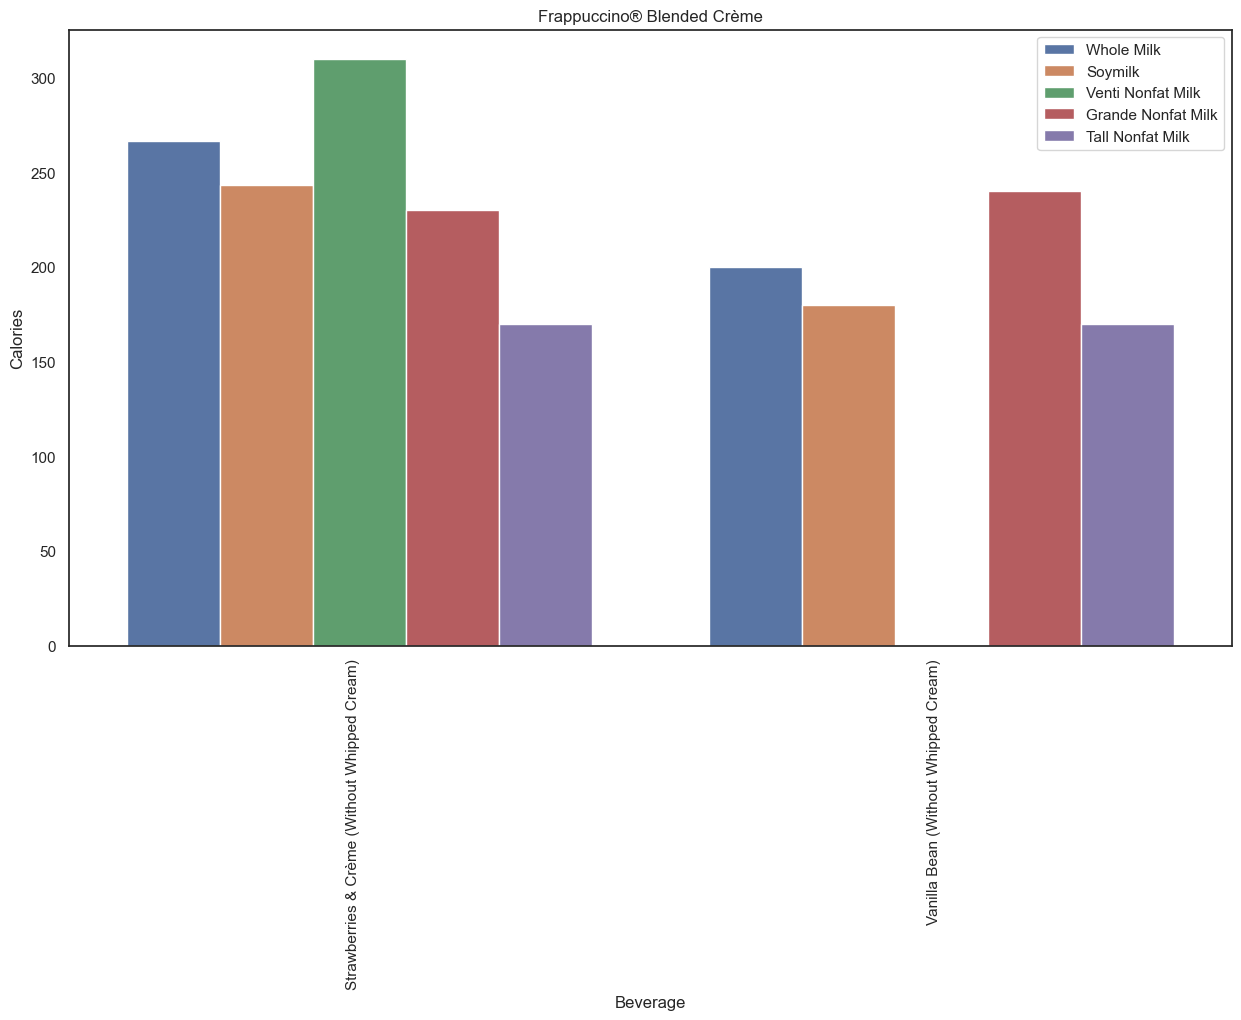

In [232]:
# Calorie  

plt.figure(figsize=(15, 8))
_ = sns.set(style='white')
_= sns.barplot(x='Beverage',y='Calories',hue='Beverage_prep',data=drink_types_df[drink_types_df['Beverage_category'] == 'Frappuccino® Blended Crème'],errorbar=None)
_ = plt.xticks(rotation=90,ha='right')
_ = plt.legend( loc = 'upper right')
_= plt.title('Frappuccino® Blended Crème')

# High calorie - Strawberries & Crème (Without Whipped Cream) - very high calorie of 350 g

In [239]:
drink_types_df.head(2)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150.0
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145.0


# Let's find a correlation between different variables

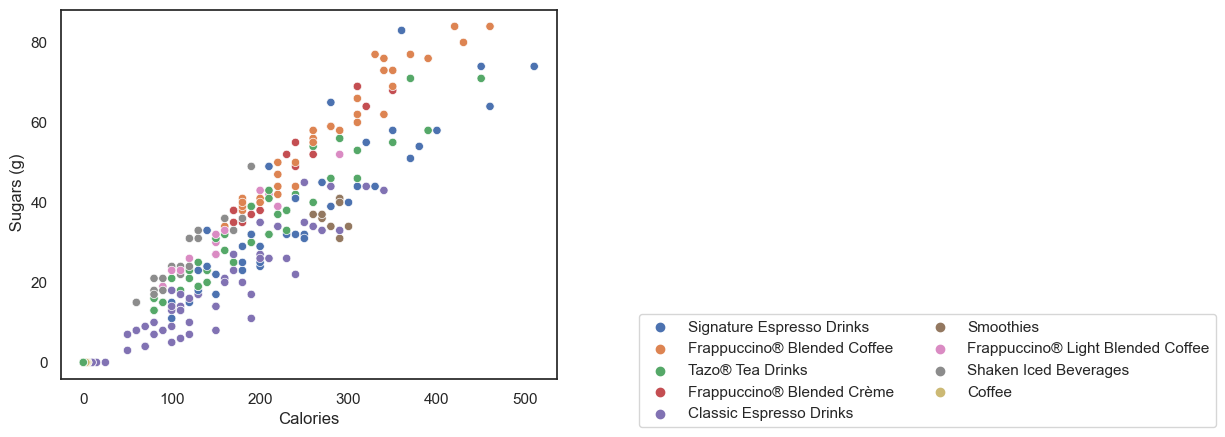

In [238]:
sns.scatterplot(data=drink_types_df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.legend(loc="lower left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

Clearly there is a trend -  when sugar increases calorie increases 

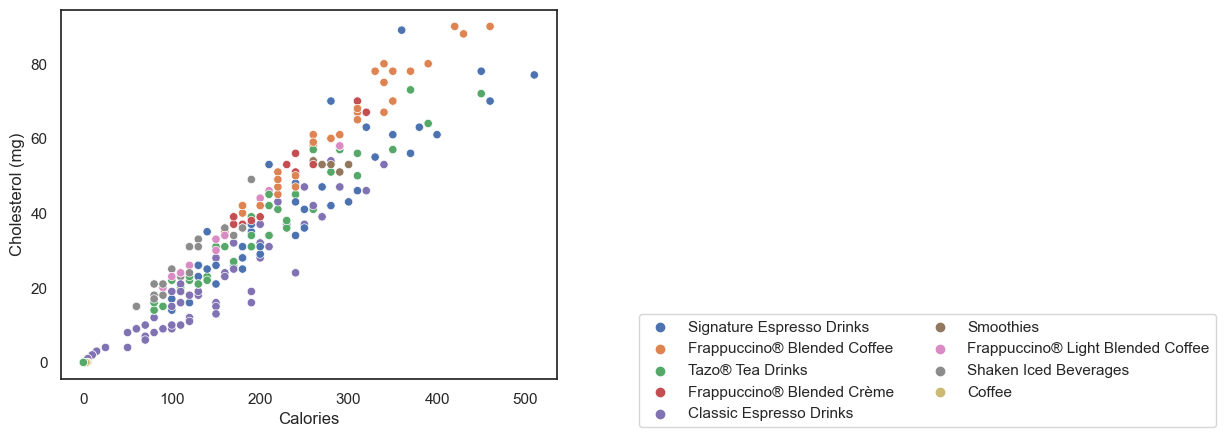

In [240]:
sns.scatterplot(data=drink_types_df, x="Calories", y="Cholesterol (mg)", hue="Beverage_category")
plt.legend(loc="lower left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

There is a trend -  when cholesterol increases calories increases 

In [244]:
drink_types_df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

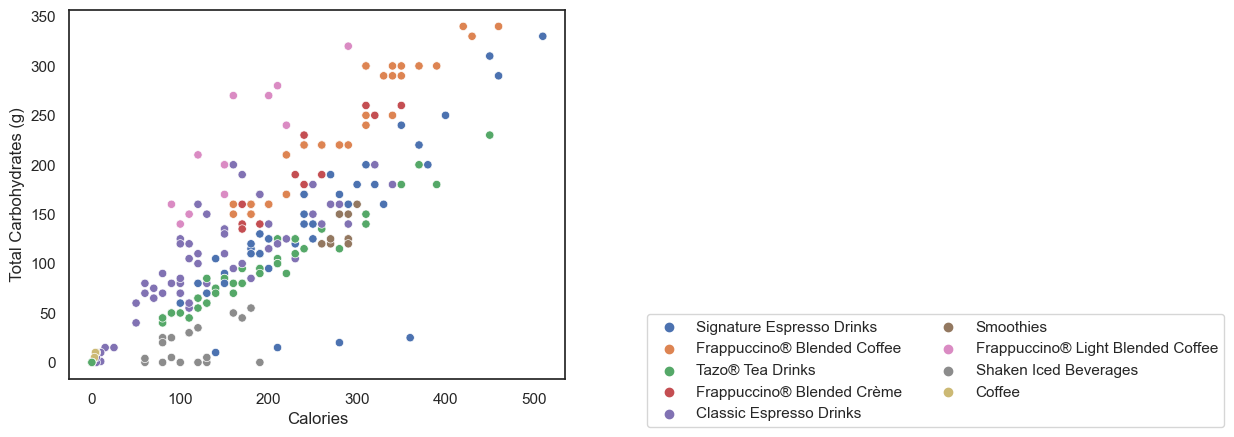

In [245]:
sns.scatterplot(data=drink_types_df, x="Calories", y=" Total Carbohydrates (g) ", hue="Beverage_category")
plt.legend(loc="lower left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

There seems be quite a trend between calories and carb

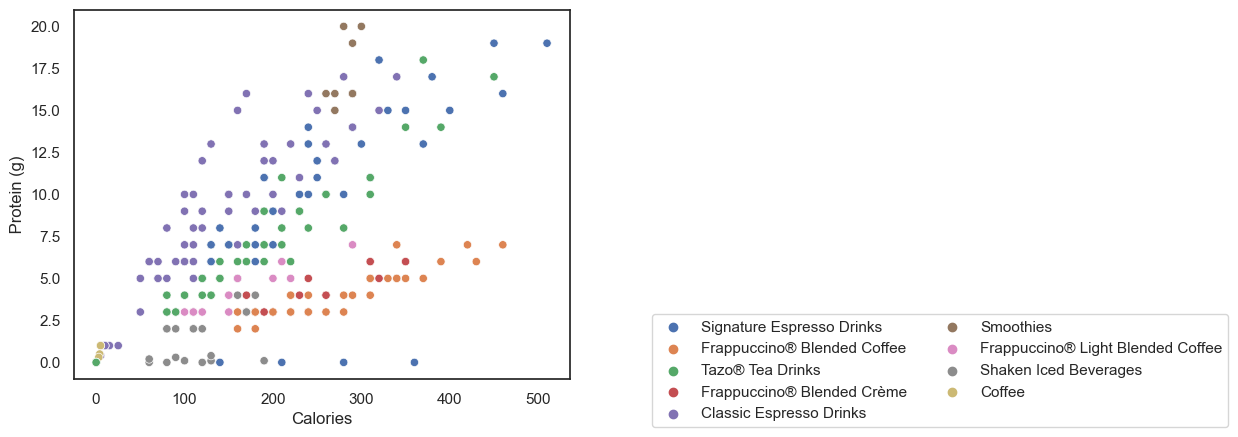

In [247]:
sns.scatterplot(data=drink_types_df, x="Calories", y=" Protein (g) ", hue="Beverage_category")
plt.legend(loc="lower left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

No correlation between calorie and protein

C:\Users\elave\AppData\Local\Temp\ipykernel_23288\96334635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = drink_types_df.corr(method='kendall')


<Axes: >

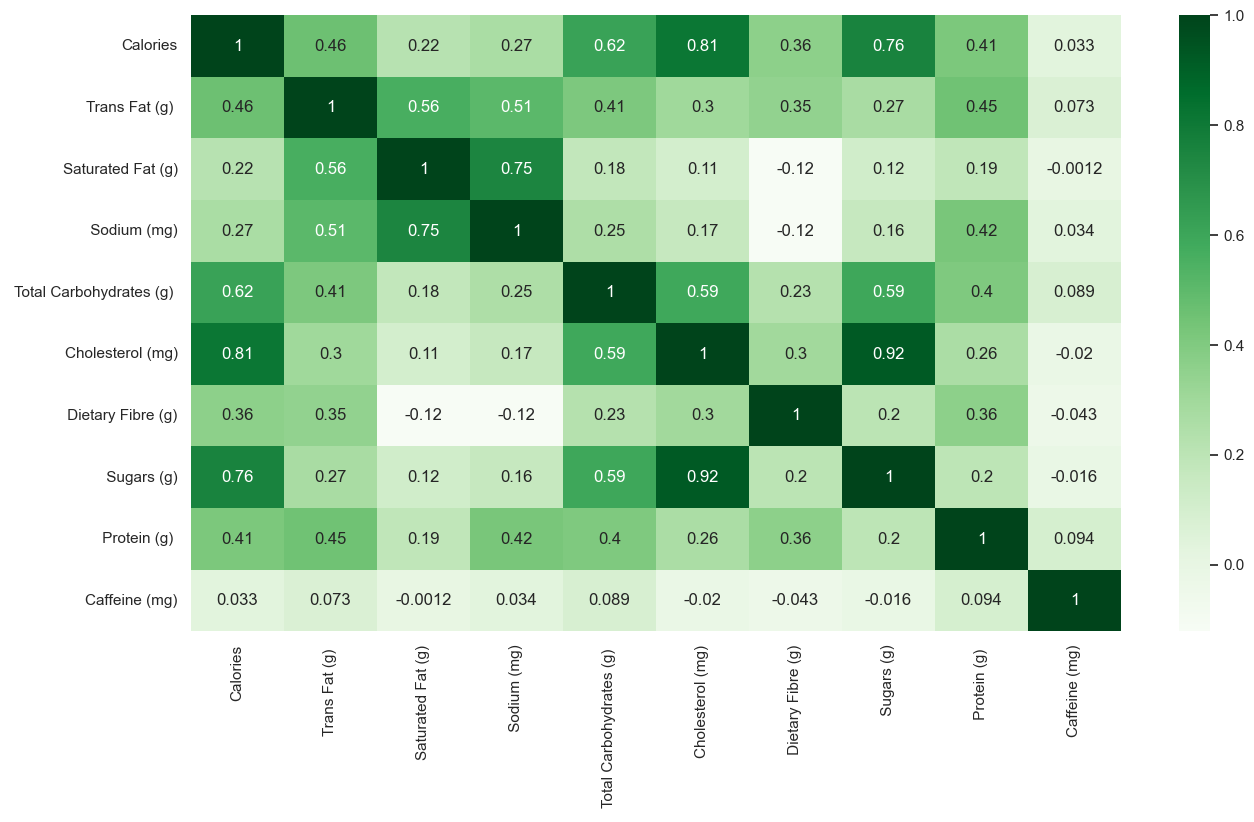

In [251]:
# Find all other correlation
corr = drink_types_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Greens")